# 52221 Principles and Applications in Stat Analysis - Exercise 1
#### NathanP23
#### https://github.com/NathanP23/Principles-and-Applications-in-Stat-Analysis-52221/tree/main/Ex1
##### in this exercise we will perform linear regression on simple data, we will analzyze correlation and if and when we can predict values with good certainty.

### Question #1

I have create [data_processor.py](data_processor.py) to help me merge .CSV files from differnet sources. Also, all CSV metadata is present in [data_config.py](data_config.py)
+   Data sources: 
    +   BTC data is from [kaggle](kaggle.com)
    +   the rest of the files are from [federal reserve bank](fred.stlouisfed.org)

+   Variables and units:
    + X is set to be the inflation rate in the USA (in percentages)
    + Y is the Close price of bitcoin per USD

    + X can be changed to the following values: 
        + BTC Data:
            + Open
            + High
            + Low
            + Adj 
            + Close
            + Volume
            + Open_Pct_Change
            + High_Pct_Change
            + Low_Pct_Change
            + Close_Pct_Change
            + Adj Close_Pct_Change
            + Volume_Pct_Change
        + Other Data:
            + Inflation_Rate
            + s&p_500
            + s&p_500_Pct_Change
            + NASDAQ
            + NASDAQ_Pct_Change
            + DOWJONES
            + DOWJONES_Pct_Change


I choose to use BTC prices rather than percetnage for 2 reasons:
+ Absolute Value Comparison: This method allows us to observe the actual price movement of Bitcoin in relation to the absolute levels of inflation rates. It can be particularly useful for visualizing the correlation between Bitcoin prices and inflation over time, understanding how Bitcoin's value as an asset behaves in different inflationary environments.

+ Long-term Trends: If we're interested in how Bitcoin is perceived as a store of value or hedge against inflation over long periods, comparing the close prices against inflation rates can highlight whether Bitcoin appreciates during times of high inflation.

In [69]:

from data_processor import process_and_append_csv
from data_processor import read_csv
from data_config import data_operations

for operation in data_operations:
    process_and_append_csv(**operation)

# Read the output CSV file and print the data
df = read_csv('output.csv')

x = df['Inflation Rate']  # Assigning Inflation Rate column to x
y = df['BTC Close Price']  # Assigning Close column to y

### Question #2

1. we will show the inflation rate as an histogram to see what rate is the most common:

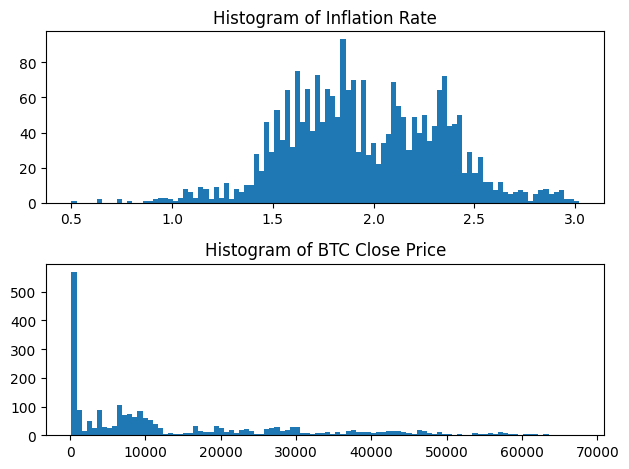

In [70]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(2)  # Creates two subplots

bins = 100 # Number of bins
# Histogram for x
axs[0].hist(x, bins=bins)  # Adjust bins as needed
axs[0].set_title(f'Histogram of {x.name}')

# Histogram for y
axs[1].hist(y, bins=bins)  # Adjust bins as needed
axs[1].set_title(f'Histogram of {y.name}')

# Show plot
plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()



The histograms provide visual insights into the distributions of the Inflation Rate and Close Prices from our dataset:

- Inflation Rate Histogram: This histogram shows the distribution of inflation rates over the time period covered by our dataset. The shape of the distribution, the range of inflation rates, and the frequency of each rate can indicate periods of economic stability or volatility. If the histogram is skewed or shows multiple peaks (modes), it might suggest varying economic conditions over time. A narrow distribution indicates consistent inflation rates, whereas a wide distribution suggests significant fluctuations.

- Close Prices Histogram: The histogram for Close Prices illustrates how the closing prices of the asset (presumably a stock or cryptocurrency) are distributed. This can reveal insights into the asset's price stability, trends, and volatility. A right-skewed distribution would indicate that most of the closing prices are lower, with fewer instances of high prices. Conversely, a left-skewed distribution suggests higher prices are more common. Multiple peaks could indicate that the asset frequently oscillates between specific price ranges.

2. Bivariate scatter diagram

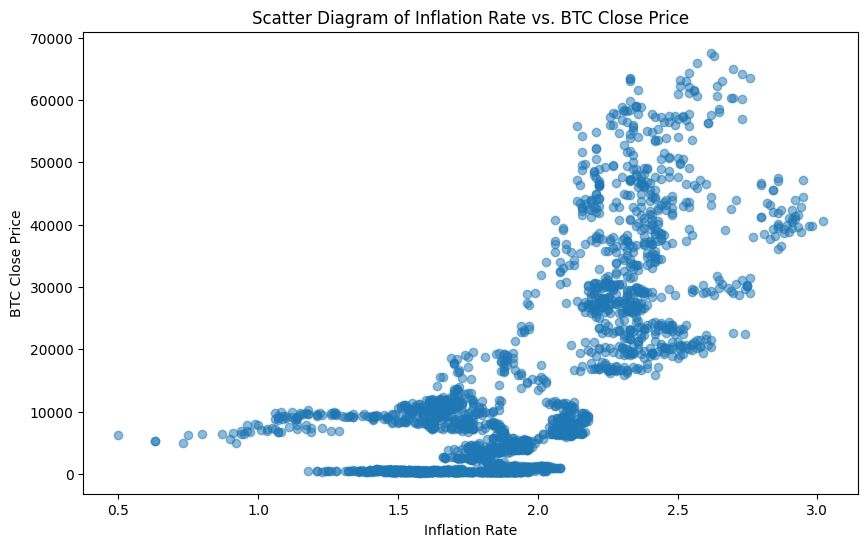

In [71]:
# Create scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(x, y, alpha=0.5)  # Plot data points, 'alpha' controls the opacity

# Adding plot labels and title
plt.title(f'Scatter Diagram of {x.name} vs. {y.name}')
plt.xlabel(f'{x.name}')
plt.ylabel(f'{y.name}')

# Show the plot
plt.show()

Based on the scatter plot we generated between Bitcoin's Close prices and the inflation rate, several observations can be made:

+ Relationship: The graph aims to visualize any potential relationship between the inflation rate and Bitcoin's Close prices on a daily basis. If there's a discernable pattern or trend, such as a general direction in which the points tend to move, it could suggest a correlation between these variables.

+ Distribution: The scatter of points across different inflation rates can give an idea of how Bitcoin's price responds to changes in inflation. A wide spread of points at certain inflation rate levels could indicate volatility or sensitivity of Bitcoin prices to inflationary pressures.

+ Outliers: Any points that lie far from the main cluster of data can be considered outliers. These instances might represent days when Bitcoin's price was unusually high or low relative to the prevailing inflation rate, possibly due to other market factors or events not captured by inflation rates alone.

+ Clusters: If there are clusters of points, these could indicate ranges of inflation rates where Bitcoin's prices tend to stabilize or behave in a predictable manner. Conversely, the absence of clear clustering could suggest that Bitcoin's prices do not have a straightforward or consistent relationship with inflation rates.

+ Correlation: Without a clear linear pattern or trend, it might be challenging to draw a firm conclusion about the correlation between inflation rates and Bitcoin prices just from visual inspection. A more detailed statistical analysis would be required to quantify the relationship.

For a quantitative analysis, calculating the Pearson correlation coefficient or Spearman's rank correlation could provide insights into the strength and direction of the relationship between inflation rates and Bitcoin's Close prices.

3. Mean

In [72]:
# Calculate the mean of the Inflation Rate
print(f'Mean {x.name}: {x.mean():.2f}%')

# Calculate the mean of the Bitcoin Close Prices
print(f'Mean {y.name}: ${y.mean():.2f}')

Mean Inflation Rate: 1.95%
Mean BTC Close Price: $14711.67


+ Mean Inflation Rate: The average inflation rate over the period covered by the dataset gives an insight into the general inflationary environment during that time. A higher mean could indicate a period of economic instability or aggressive monetary policy, while a lower mean might suggest a more stable economic period. Comparing this to historical averages could reveal whether the inflation rate during the dataset's timeframe was unusually high, low, or within expected ranges.

+ Mean Bitcoin Close Price: The average closing price of Bitcoin provides a snapshot of its overall market performance over the covered period. A high mean close price could reflect a bullish period for Bitcoin, possibly driven by high demand, positive market sentiment, or broader adoption. Conversely, a lower mean might indicate bearish conditions, regulatory challenges, or decreased investor interest. The mean close price can also serve as a benchmark to compare individual daily prices against, to gauge whether most days were above or below the average.

+ Interpreting the Results Together
Economic Context: By examining both averages together, we can start to hypothesize about Bitcoin's behavior in different economic conditions. For example, if the mean inflation rate is high and the mean Bitcoin price is also high, it might suggest that investors are turning to Bitcoin as a hedge against inflation.

    + Volatility: The mean values alone don't tell the whole story, especially regarding volatility. However, comparing these means with the range (minimum and maximum values) and standard deviation of the data can provide insights into the volatility of both inflation rates and Bitcoin prices during the period.

    + Investment Insight: For investors or analysts, these mean values could offer a preliminary insight into whether Bitcoin behaves as an inflation hedge. If Bitcoin's price tends to rise when inflation is high (assuming the dataset covers multiple inflationary periods), it might reinforce the argument that Bitcoin can serve as a digital gold or safe haven asset.

4. Median

In [73]:
# Calculate the median of the Inflation Rate
print(f'Median {x.name}: {x.median():.2f}%')

# Calculate the median of the Bitcoin Close Prices
print(f'Median {y.name}: ${y.median():.2f}')

Median Inflation Rate: 1.91%
Median BTC Close Price: $8253.62


+ Interpretations:
    + Relative Stability in Inflation: The median inflation rate suggests a backdrop of relative economic stability during the time frame of the dataset. For investors and analysts, understanding how Bitcoin behaves in such an inflation environment is crucial, especially in assessing its potential as an inflation hedge or a speculative asset.

    + Bitcoin’s Market Position: The median close price underscores the point at which Bitcoin prices are centered, providing insights into its valuation over the period. For instance, if the dataset includes periods of both bullish and bearish markets, the median price offers a more stable point of reference than daily fluctuations.

    + Comparison with Mean Values: Comparing these median values with the mean values calculated earlier can reveal the distribution's skewness. If the mean is significantly higher than the median, it suggests a right-skewed distribution (indicating that higher values are pulling the mean up). Conversely, if the mean is close to the median, the distribution might be more symmetric, indicating a balanced dataset without extreme skew.

    + Investment and Economic Insights: For investors, these medians can provide a benchmark for evaluating entry and exit points. For economists or analysts, the relationship between median inflation rates and median Bitcoin prices could offer insights into Bitcoin’s behavior in different economic climates, particularly its role in portfolios during times of moderate inflation.

Overall, these median values contribute to a deeper understanding of both the economic conditions represented by the inflation rate and the performance of Bitcoin as an investment asset during the period covered by the dataset.

5. percentiles

In [74]:

print(f"{x.name} 25th Percentile: {x.quantile(0.25):.2f}%")
print(f"{x.name} 50th Percentile (Median): {x.quantile(0.50):.2f}%")
print(f"{x.name} 75th Percentile: {x.quantile(0.75):.2f}%")


print(f"{y.name} 25th Percentile: {y.quantile(0.25):.2f}%")
print(f"{y.name} 50th Percentile (Median): {y.quantile(0.50):.2f}%")
print(f"{y.name} 75th Percentile: {y.quantile(0.75):.2f}%")

Inflation Rate 25th Percentile: 1.67%
Inflation Rate 50th Percentile (Median): 1.91%
Inflation Rate 75th Percentile: 2.25%
BTC Close Price 25th Percentile: 921.74%
BTC Close Price 50th Percentile (Median): 8253.62%
BTC Close Price 75th Percentile: 24002.39%


+ Insights from the Results:
    + Inflation Rate Distribution: The inflation rates between the 25th and 75th percentiles span from 1.67% to 2.25%, suggesting a relatively tight range. This implies a consistent inflation environment over the period analyzed, without extreme volatility in inflation rates.

    + Bitcoin Price Range: The wide range between the 25th and 75th percentiles for Bitcoin's Close prices, from $921.74 to $24,002.39, underscores Bitcoin's high volatility and the significant appreciation in its price over time. This broad distribution indicates periods of both low prices (potentially early in the dataset's timeframe) and significant highs, reflecting the cryptocurrency's known price volatility.

    + Comparative Stability vs. Volatility: Comparing the relatively stable inflation rate distribution to the wide-ranging distribution of Bitcoin prices highlights the contrast between the economic measure of inflation and the volatility inherent in cryptocurrency markets.

    + Investment and Economic Analysis: For investors, these percentiles might help in understanding the risk and return profile of Bitcoin, especially in terms of entry points (buying at or below the 25th percentile) and potential highs (approaching the 75th percentile). Economically, the analysis might reinforce Bitcoin's decoupling from traditional economic indicators like inflation, given its independent market dynamics.

These percentiles offer a nuanced view of the data, helping to identify the spread and central tendencies within the inflation rate and Bitcoin's Close prices, and can be especially useful for risk assessment, investment strategy, and economic analysis.

6. Standard deviation

In [75]:
# Calculate the standard deviation of the Inflation Rate
print(f"Standard Deviation of {x.name}: {x.std():.2f}%")

# Calculate the standard deviation of the Bitcoin Close Prices
print(f"Standard Deviation of {y.name}: {y.std():.2f}%")

Standard Deviation of Inflation Rate: 0.38%
Standard Deviation of BTC Close Price: 16265.30%


The standard deviation (SD) measures the dispersion or variability of data points in a dataset. A higher standard deviation indicates that the data points are more spread out from the mean, while a lower standard deviation suggests that the data points are closer to the mean. Here's what can be said about the standard deviations of the 'Inflation_Rate' and 'BTC Close Price' columns:

+ Inflation Rate:
A higher standard deviation for the 'Inflation_Rate' column indicates that the inflation rates have significant variability over the given time period.
This could mean that there are periods of both high and low inflation, leading to a more volatile economic environment.

+ BTC Close Price:
A higher standard deviation for the 'BTC Close Price' column suggests that the Bitcoin (BTC) closing prices have experienced significant price fluctuations during the specified time frame.
This indicates that the BTC market has been more volatile, with large price swings.

### Question #3

1. Calculate the correlation coefficient:


In [76]:
import numpy as np
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.720462094680713


+ The correlation coefficient measures the strength and direction of the linear relationship between 'Inflation_Rate' and 'BTC Close Price'. A positive correlation suggests that as inflation rates increase, BTC close prices tend to increase, while a negative correlation suggests the opposite. The closer the correlation coefficient is to +1 or -1, the stronger the linear relationship.
+ The slope of the regression line (slope parameter) represents how much the BTC close price is expected to change for a one-unit change in the inflation rate. A positive slope indicates a positive relationship, while a negative slope indicates a negative relationship.
+ The intercept of the regression line (intercept parameter) represents the estimated BTC close price when the inflation rate is zero.

2. Derive the regression line

Slope (Coefficient): 30645.33563647309
Intercept: -45142.431463131565
Pearson Correlation Coefficient (r): 0.720462094680713
R-squared: 0.5190656298717207
Error (Residuals):
Root Mean Squared Error: 11277.47
BTC Close Price = -45142.431463131565 + 30645.33563647309 * Inflation Rate + u


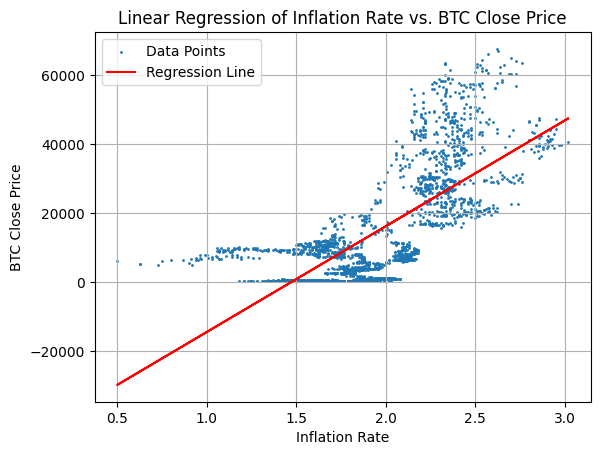

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error



# Calculate the slope, intercept, Pearson correlation coefficient, R-squared, and error
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2
predicted_y = slope * x + intercept
error = y - predicted_y

# Display the results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)
print("Pearson Correlation Coefficient (r):", r_value)
print("R-squared:", r_squared)
print("Error (Residuals):")
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y, predicted_y)):.2f}')
print(f'{y.name} = {intercept} + {slope} * Inflation Rate + u')


# Plot the data points and the regression line
plt.scatter(x, y, label='Data Points', s=1)
plt.plot(x, predicted_y, color='red', label='Regression Line')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.title(f'Linear Regression of {x.name} vs. {y.name}')
plt.legend()
plt.grid(True)
plt.show()

we will evaluate the magnitude and sign of the correlation coefficient to determine the strength and direction of the relationship.
We can analyze the slope and intercept of the regression line to understand how changes in the inflation rate relate to changes in BTC close prices.
relationship quality indices such as R-squared  assess the goodness of fit of the linear regression model.
we can reference any unusual observations or outliers that may affect the relationship's interpretation.


### Question #4

In [80]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np


# Prepare the data for regression
X = df[['Inflation Rate']]  # Explanatory variable
y = df['BTC Close Price']  # Dependent variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Randomly select 5 observations from the dataset
np.random.seed(42)  # For reproducibility, optional
selected_indices = np.random.choice(df.index, size=5, replace=False)
selected_observations = df.loc[selected_indices]

# Make predictions for the selected observations
predicted_close_prices = model.predict(selected_observations[['Inflation Rate']])

# Calculate residuals (true value - predicted value)
residuals = selected_observations['BTC Close Price'] - predicted_close_prices

# Compile the information for the selected observations
selected_observations['Predicted_Close'] = predicted_close_prices
selected_observations['Residual'] = residuals

# Display the information
print(selected_observations[['Inflation Rate', 'BTC Close Price', 'Predicted_Close', 'Residual']])


      Inflation Rate  BTC Close Price  Predicted_Close      Residual
1737            2.33     47166.687500     26261.200570  20905.486930
755             1.84      3892.350098     11244.986108  -7352.636010
1670            2.40     39294.199219     28406.374064  10887.825154
1337            1.65      9358.589844      5422.372337   3936.217507
1872            2.91     40951.378906     44035.495239  -3084.116333
